In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1024, 768))
display.start()

In [3]:
from functools import partial

import gym
import tensorflow as tf

from spinup import ppo_tf1 as ppo

import pandas as pd
from matplotlib import pyplot as plt
import json
from IPython import display as ipd

In [4]:
env_name = 'CartPole-v1'
env_fn = partial(gym.make, env_name)
ac_kwargs = dict(hidden_sizes=(32,))
with tf.Graph().as_default():
    ppo(
        env_fn,
        steps_per_epoch=2000,
        epochs=10,
        ac_kwargs=ac_kwargs,
        logger_kwargs={
            'output_dir': f'./experiments/{env_name}',
            'output_fname': 'progress.txt'
#             'exp_name': 'first'
        },
    )

Logging data to ./experiments/CartPole-v1/progress.txt
Saving config:

{
    "ac_kwargs":	{
        "hidden_sizes":	[
            32
        ]
    },
    "actor_critic":	"mlp_actor_critic",
    "clip_ratio":	0.2,
    "env_fn":	"functools.partial(<function make at 0x7f54087f6e18>, 'CartPole-v1')",
    "epochs":	10,
    "gamma":	0.99,
    "lam":	0.97,
    "logger":	{
        "<spinup.utils.logx.EpochLogger object at 0x7f5384b196d8>":	{
            "epoch_dict":	{},
            "exp_name":	null,
            "first_row":	true,
            "log_current_row":	{},
            "log_headers":	[],
            "output_dir":	"./experiments/CartPole-v1",
            "output_file":	{
                "<_io.TextIOWrapper name='./experiments/CartPole-v1/progress.txt' mode='w' encoding='UTF-8'>":	{
                    "mode":	"w"
                }
            }
        }
    },
    "logger_kwargs":	{
        "output_dir":	"./experiments/CartPole-v1",
        "output_fname":	"progress.txt"
    },
    "ma

In [5]:
df = pd.read_csv(f'experiments/{env_name}/progress.txt', sep='\t')

In [6]:
df.head()

,Epoch,AverageEpRet,StdEpRet,MaxEpRet,MinEpRet,EpLen,AverageVVals,StdVVals,MaxVVals,MinVVals,TotalEnvInteracts,LossPi,LossV,DeltaLossPi,DeltaLossV,Entropy,KL,ClipFrac,StopIter,Time
0,0,20.635416,9.714808,66.0,9.0,20.635416,-0.022394,0.403091,1.098338,-1.150523,2000,-1.473427e-07,211.77899,-0.012838,-21.729675,0.691139,0.007131,0.1175,79.0,0.794125
1,1,24.329268,12.593121,64.0,9.0,24.329268,0.921630,0.174838,1.394350,-0.182736,4000,-5.459786e-08,273.36926,-0.010621,-46.392290,0.689661,0.003189,0.0545,79.0,1.356215
2,2,28.782608,16.075790,83.0,11.0,28.782608,2.801242,0.169188,3.202984,2.341983,6000,6.961822e-08,336.44640,-0.009765,-69.985900,0.680535,0.002564,0.0360,79.0,1.959674
3,3,32.573770,17.110498,86.0,11.0,32.573770,5.611447,0.317628,6.578888,4.613779,8000,3.409386e-08,312.63568,-0.016150,-72.634840,0.676892,0.008901,0.0435,79.0,2.556336
4,4,56.114285,39.433685,151.0,10.0,56.114285,8.908900,0.988083,11.803217,5.976557,10000,-1.692772e-08,897.31680,-0.014167,-209.215940,0.658051,0.003365,0.0285,79.0,3.255004


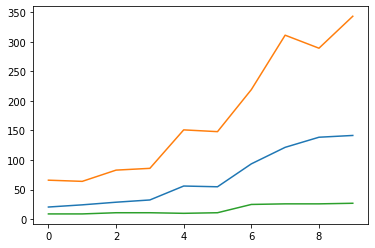

In [7]:
plt.plot(df['Epoch'], df['AverageEpRet'])
plt.plot(df['Epoch'], df['MaxEpRet'])
plt.plot(df['Epoch'], df['MinEpRet'])

In [8]:
from spinup.utils.test_policy import run_policy, load_policy_and_env
from time import sleep

In [9]:
env, get_action = load_policy_and_env(
    'experiments/CartPole-v1',
)



Loading from experiments/CartPole-v1/tf1_save.


Using default action op.


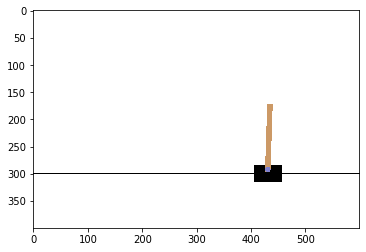

Episode 1 	 EpRet 100.000 	 EpLen 100
-------------------------------------
|    AverageEpRet |             100 |
|        StdEpRet |               0 |
|        MaxEpRet |             100 |
|        MinEpRet |             100 |
|           EpLen |             100 |
-------------------------------------


In [10]:
run_policy(env, get_action, max_ep_len=100, num_episodes=1, render=True)

In [16]:
from gym_jiminy.envs import CartPoleJiminyEnv
env = CartPoleJiminyEnv()

In [17]:
env.reset()

array([ 0.00504748, -0.04820786,  0.02664586, -0.01989636])

In [20]:
env.render()

RuntimeError: Impossible to create backend or connect to it.

RuntimeError: No simulation running. Please call `start` before `render`.